# LITERATURE REVIEW: 
We found this [article](https://towardsdatascience.com/deep-learning-image-classification-with-fast-ai-fc4dc9052106) that does image classification, and setup our Data folder similar to theirs

# MODELING:
* **Loss function**: Mean Sqaure Error (MSE)
* **Architecture**: Resnet 34, 34 layers
* **Learning Rate**: 5e-3 followed by 5e-6
* **Batch size**: 32



# EXPERIMENTATION:
1. Used FastAI's integrated dataloader to load our collected images
2. We collected data for a train and test set using a 3-1 split 
3. We used FastAI to setup the initial model, but plan to switch to PyTorch for a more robust approach
4. Tools: numpy, fastai

In [1]:
%pylab inline

import os
from google.colab import drive
import numpy as np
import glob
from matplotlib.pyplot import imread, imshow, title

from fastai.vision import *

from google.colab import drive
drive.mount('/content/drive')

Populating the interactive namespace from numpy and matplotlib
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = '/content/drive/My Drive/ITCS 5152/PG-13: Text to Speech/Stage 3/Data/'

In [4]:
data = ImageDataBunch.from_folder(data_dir, train='train', valid='test', bs=32, size=128)


In [5]:
model = cnn_learner(data, models.resnet34, metrics=[accuracy, error_rate])
model.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 64, 64]         9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 64, 64]         128        True      
______________________________________________________________________
ReLU                 [64, 64, 64]         0          False     
______________________________________________________________________
MaxPool2d            [64, 32, 32]         0          False     
______________________________________________________________________
Conv2d               [64, 32, 32]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 32, 32]         128        True      
______________________________________________________________________
ReLU                 [64, 32, 32]         0          False     
___________________________________________________

In [6]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


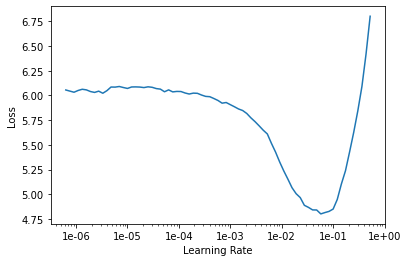

In [7]:
model.recorder.plot()

In [8]:
lr = 5e-3
model.fit_one_cycle(8, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,5.818499,4.333971,0.000000,1.000000,00:03
1,4.759264,4.242887,0.093750,0.906250,00:03
2,3.512864,3.898574,0.140625,0.859375,00:02
3,2.617724,3.823989,0.140625,0.859375,00:02
4,2.009766,3.364943,0.187500,0.812500,00:02
5,1.538674,3.197137,0.187500,0.812500,00:02
6,1.218166,3.195742,0.187500,0.812500,00:02
7,0.976588,3.163321,0.187500,0.812500,00:02


In [9]:
model.unfreeze()

In [10]:
model.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


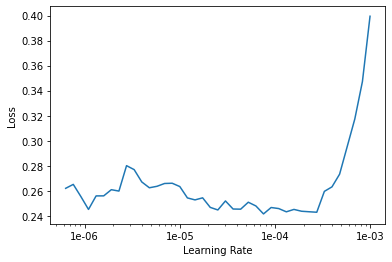

In [11]:
model.recorder.plot()

In [12]:
lr=5e-6
model.fit_one_cycle(16, slice(lr/10, lr))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.274289,3.198251,0.187500,0.812500,00:03
1,0.260824,3.202752,0.171875,0.828125,00:03
2,0.276612,3.220275,0.171875,0.828125,00:03
3,0.256799,3.159470,0.187500,0.812500,00:03
4,0.250728,3.206352,0.203125,0.796875,00:03
5,0.244177,3.215650,0.187500,0.812500,00:03
6,0.242256,3.170357,0.187500,0.812500,00:03
7,0.240188,3.181084,0.171875,0.828125,00:03
8,0.237401,3.130055,0.187500,0.812500,00:03
9,0.225631,3.146388,0.203125,0.796875,00:03


# Results
Here you will find a confusion matrix and the top 12 losses from the model.
* **Percision**: 9.25952380952381 
* **Recall**: 15.0 
* **Accuracy**: 23%

In [13]:
interp = ClassificationInterpretation.from_learner(model)

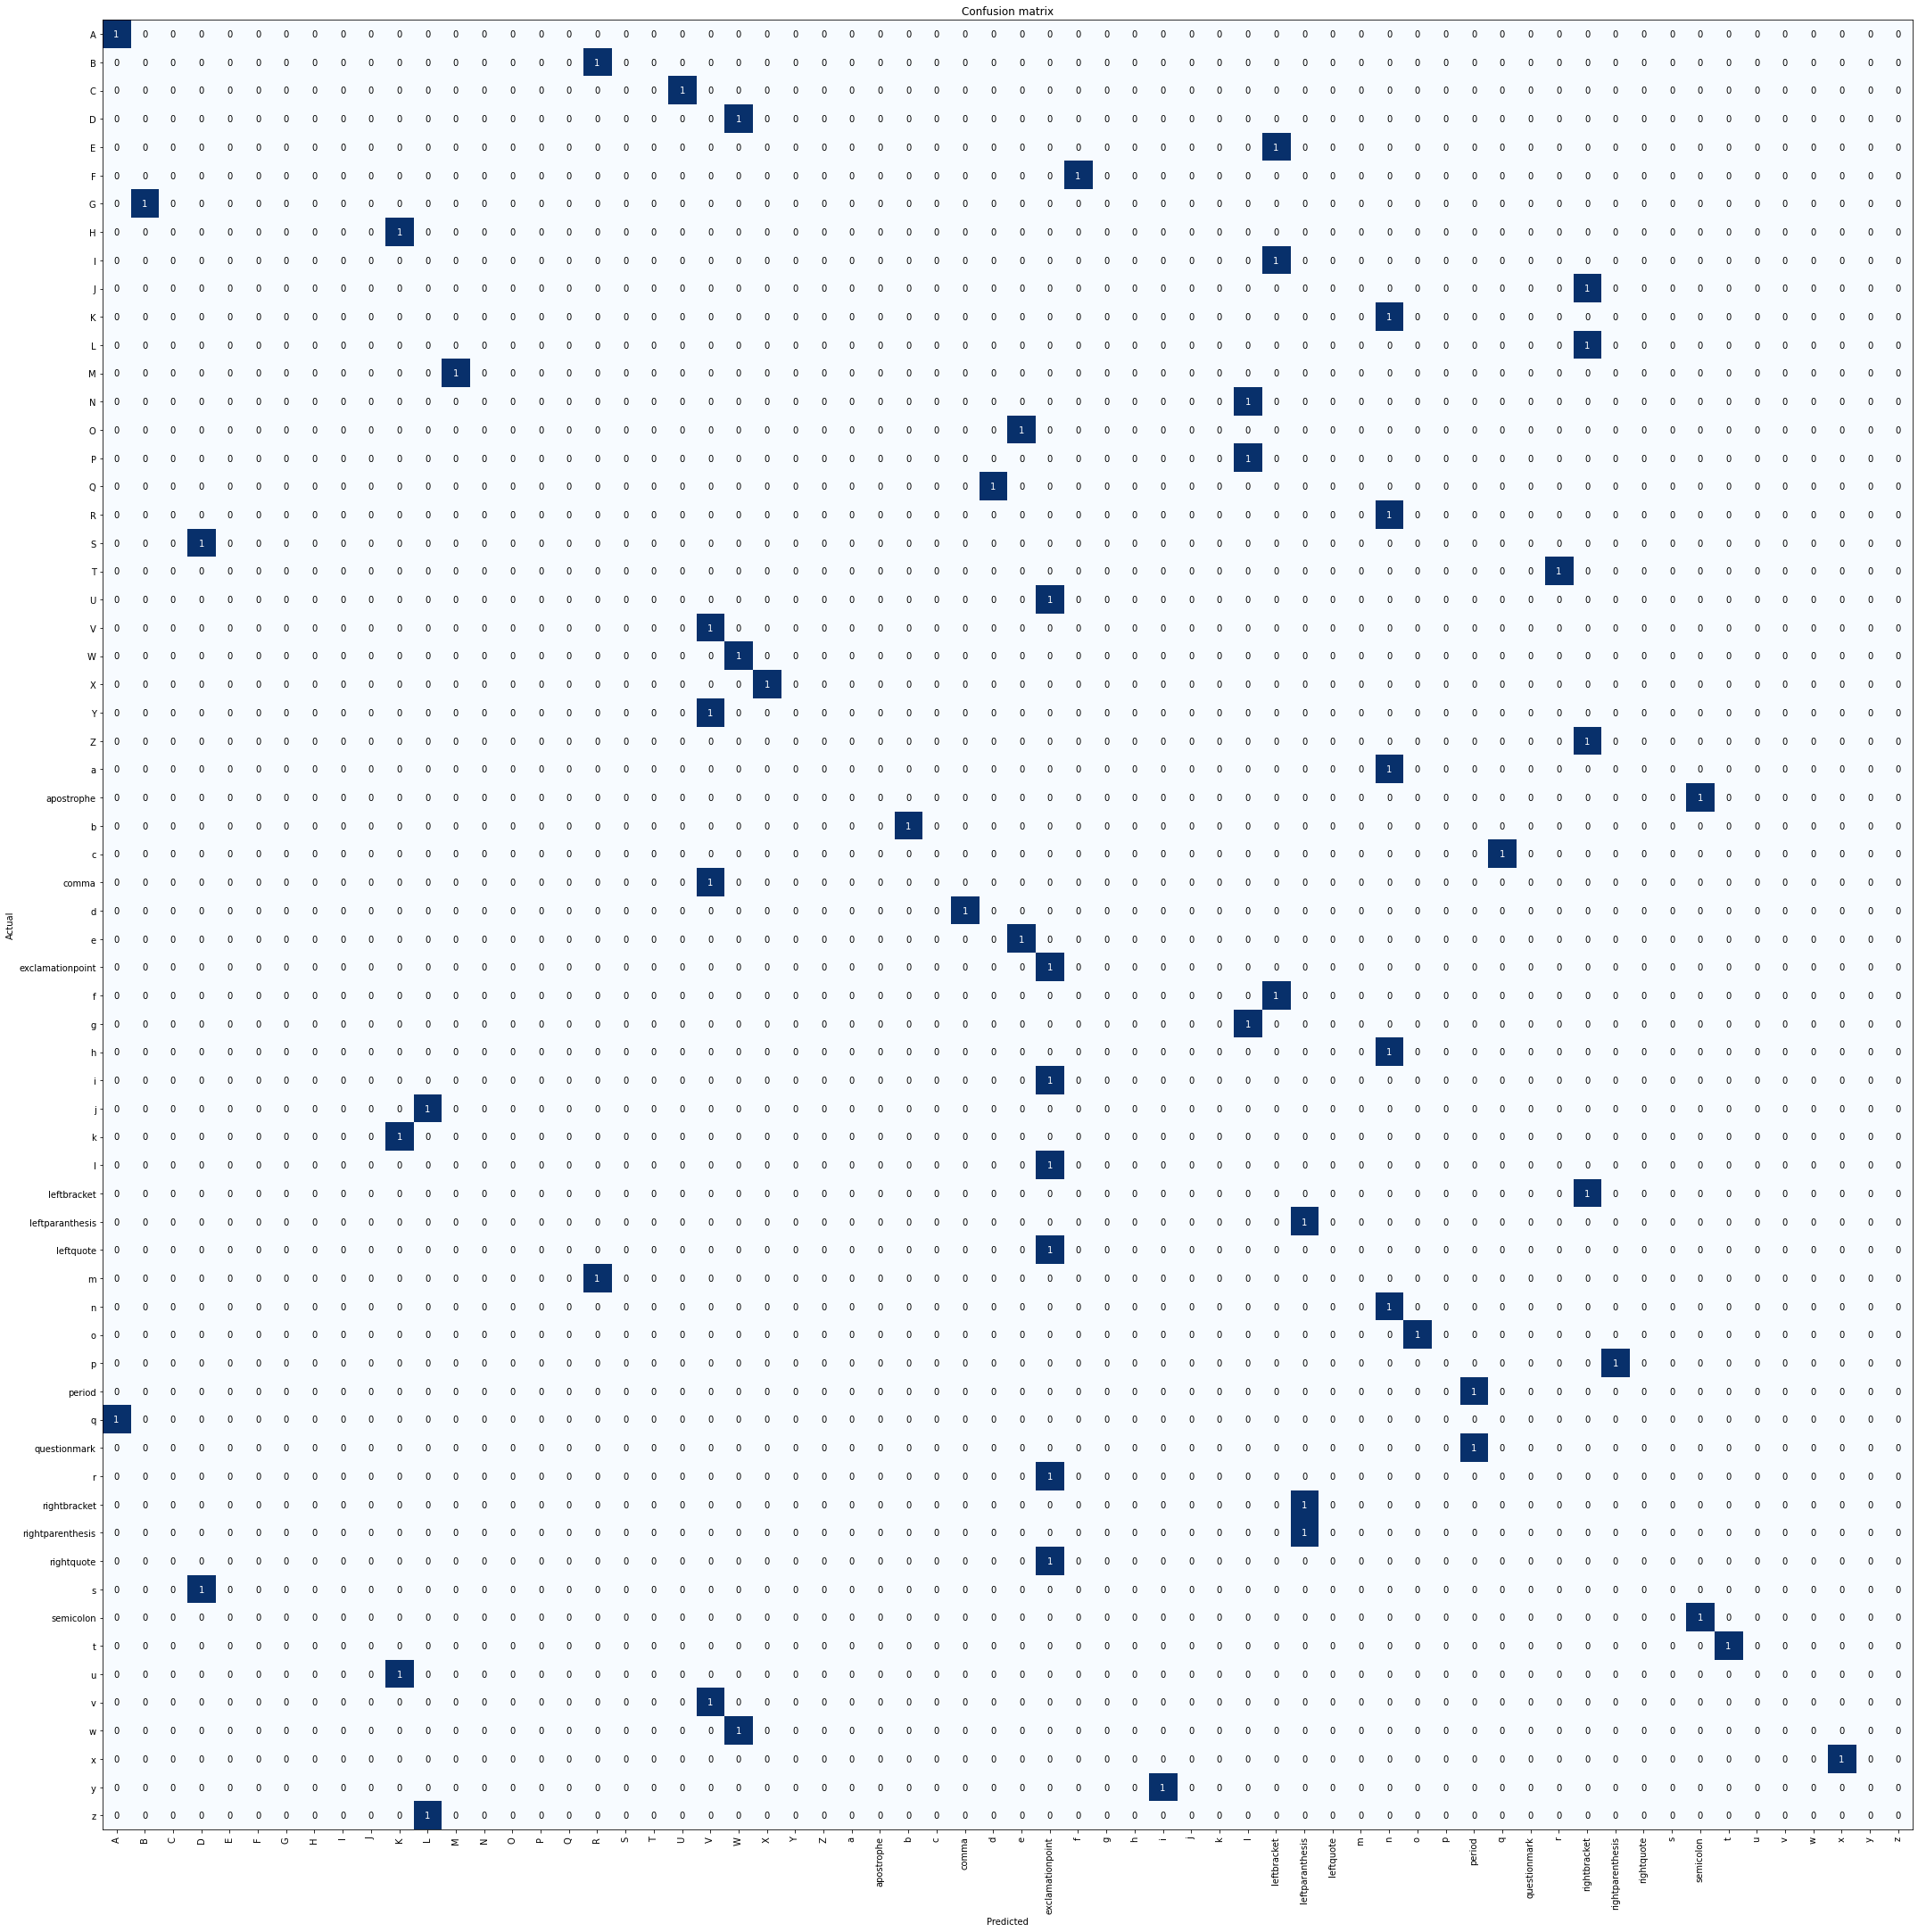

In [14]:
interp.plot_confusion_matrix(figsize(30,30))

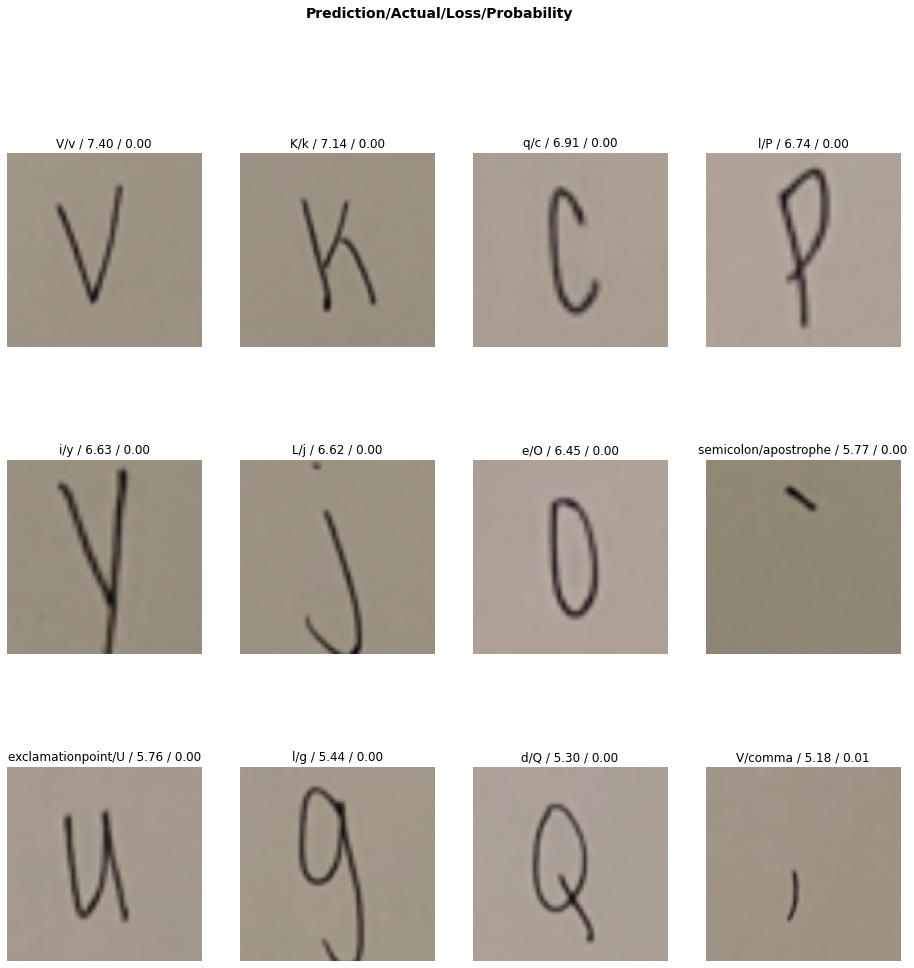

In [15]:
interp.plot_top_losses(k=12, figsize=(16,16))

In [16]:
cfm = interp.confusion_matrix()

In [17]:
cfm = np.nan_to_num(cfm)

In [18]:
FP = cfm.sum(axis=0) - np.diag(cfm) 
FN = cfm.sum(axis=1) - np.diag(cfm) 
TP = np.diag(cfm)
TN = cfm.sum() - (FP + FN + TP)

In [19]:
percision = (TP / (TP + FP))
recall = (TP / (TP + FN))

In [20]:
percision = np.nan_to_num(percision)
recall = np.nan_to_num(recall)

In [22]:
print(f"Percision: {percision.sum()} \nRecall: {recall.sum()} \nAccuracy: {23}%")

Percision: 9.25952380952381 
Recall: 15.0 
Accuracy: 23%


# What we learned
Throughout this stage, we came to the conclusion that we need more samples in order to get a higher accuracy. 

Also, in the future, we will be moving away from fastAI and will be implementing PyTorch as a replacement for a more robust library.